In [3]:
import pandas as pd
import numpy as np
import glob
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt

In [4]:
plt.rc('axes', axisbelow=True)


In [163]:
base_path = Path("results")
paths = os.listdir(base_path)

In [18]:
names = [
    "Baseline - DDR3 (1600 MHz)",
    "4 GHz clock", 
    "400 MHz clock", 
    "L1 Associativity of 16", 
    "DDR3 (2133 MHz)", 
    "LPDDR2"
]
mapping = {name: i for i, name in enumerate(names)}
#key = df['day'].map(mapping)

In [19]:
better_names = {
 'primes_random_baseline': "Baseline Random Replacement Policy",
 'primes_two_level': "Two-level cache",
 'primes_400MHz': "400 MHz clock",
 'primes_L1_assoc_16': "L1 Associativity of 16",
 #'primes_baseline': "Baseline (Two-level cache)",
 'primes_baseline': "Baseline - DDR3 (1600 MHz)",
 'primes_4GHz': "4 GHz clock",
 'primes_LPDDR2_S4_1066': "LPDDR2",
 'primes_true_random': "True Random Replacement Policy",
 'primes_three_level': "Three-level cache",
 'primes_DDR3_2133': "DDR3 (2133 MHz)"
}

In [58]:
names = [
    "Baseline\n(Two-level cache)",
    "High clock frequency", 
    "Low clock frequency", 
    "High associativity", 
    "Fast memory", 
    "Low-power memory"
]
mapping = {name: i for i, name in enumerate(names)}
#key = df['day'].map(mapping)

In [159]:
better_names = {
 'primes_random_rp': "Random Replacement Policy (Two-level cache)",
 'primes_three_level_random_rp': "Random Replacement Policy (Three-level cache)",
 'primes_true_random_rp': "True Random Replacement Policy (Two-level cache)",
 'primes_three_level_true_random_rp': "True Random Replacement Policy (Three-level cache)",
 'primes_two_level': "Two-level cache",
 'primes_400MHz': "Low clock frequency",
 'primes_L1_assoc_16': "High associativity",
 'primes_baseline': "Baseline\n(Two-level cache)",
 #'primes_baseline': "Baseline - DDR3 (1600 MHz)",
 'primes_4GHz': "High clock frequency",
 'primes_LPDDR2_S4_1066': "Low-power memory",
 'primes_true_random': "True Random Replacement Policy",
 'primes_three_level': "Three-level cache",
 'primes_DDR3_2133': "Fast memory"
}

In [160]:
def get_hist_data(paths, keyword):
  hist_data = dict()

  for p in paths:
      result_p = base_path / p
      
      stats_file = str(result_p / "run_0_dim_stats.txt")
      files = glob.glob(stats_file)
      with open(files[0], "r") as f:
        next(f)
        next(f)
        lines = f.readlines()
        for l in lines:
          l = re.sub("\s+", " ", l).split(" ")
          if keyword in l[0]:
            hist_data[p] = float(l[1])
  return hist_data

In [61]:
part_1_paths = [
 'primes_400MHz',
 'primes_L1_assoc_16',
 'primes_baseline',
 'primes_4GHz',
 'primes_LPDDR2_S4_1066',
 'primes_DDR3_2133']

hist_data = get_hist_data(part_1_paths, "simSeconds")

In [62]:
y_values = [None] * 6
x_values = [None] * 6

for k,v in hist_data.items():
  idx = mapping[better_names[k]]
  y_values[idx] = better_names[k]
  x_values[idx] = v

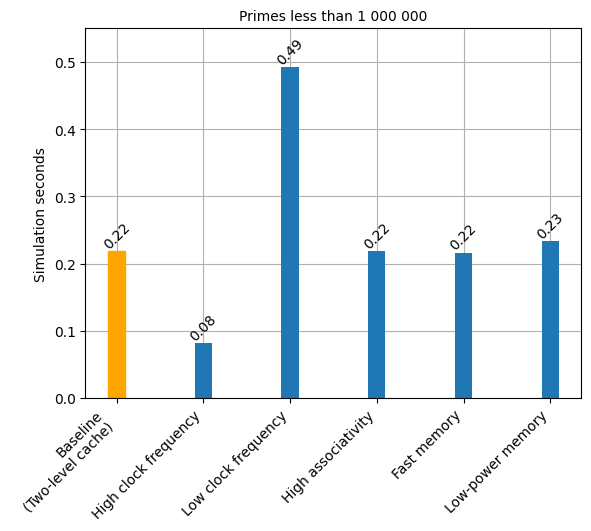

In [63]:
fig, ax = plt.subplots()
bars = ax.bar(y_values, x_values, width=0.2)


for idx, c in enumerate(ax.containers):
    labels = [f"{round(v,2)}" for v in c.datavalues]
    ax.bar_label(c, labels=labels, rotation=45, label_type="edge")

#fig = plt.figure(figsize=(8,5))
plt.grid()
#barlist = plt.bar(y_values, x_values, width=0.2)
plt.ylim((0,0.55))
bars[0].set_color('orange')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Simulation seconds")
plt.title('Primes less than 1 000 000', size=10)
plt.show()


In [64]:
hist_data = get_hist_data(part_1_paths, "demandAvgMissLatency::total")

In [66]:
hist_data

{'primes_400MHz': 176426.208396,
 'primes_L1_assoc_16': 99049.716027,
 'primes_baseline': 99004.213981,
 'primes_4GHz': 60988.388744,
 'primes_LPDDR2_S4_1066': 119246.198558,
 'primes_DDR3_2133': 96165.338256}

In [81]:
y_values = [None] * 6
x_values = [None] * 6

for k,v in hist_data.items():
  idx = mapping[better_names[k]]
  y_values[idx] = better_names[k]
  #x_values[idx] = int(v / 1e+6)
  x_values[idx] = int(int(v) / 1000)

<BarContainer object of 6 artists>


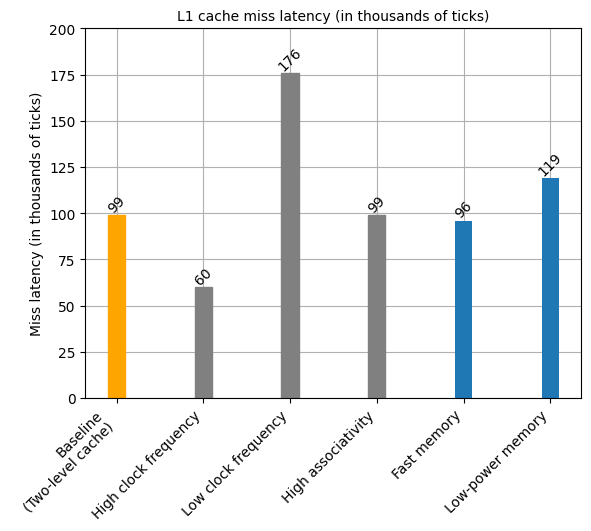

In [83]:
fig, ax = plt.subplots()
bars = ax.bar(y_values, x_values, width=0.2)
filter_names = ['Baseline (Two-level cache)','DDR3 (2133 MHz)','LPDDR2']

for idx, c in enumerate(ax.containers):
    # Filter the labels
    print(c)
    labels = [f"{v}" for v in c.datavalues]
    ax.bar_label(c, labels=labels, rotation=45, label_type="edge")

#= plt.figure(figsize=(8,5))
plt.grid()
#barlist = plt.bar(y_values, x_values, width=0.2)
bars[0].set_color('orange')
bars[1].set_color('grey')
bars[2].set_color('grey')
bars[3].set_color('grey')
plt.xticks(rotation=45, ha='right')
plt.ylim((0,200))
plt.ylabel("Miss latency (in thousands of ticks)")
plt.title('L1 cache miss latency (in thousands of ticks)', size=10)
plt.show()

In [ ]:
hist_data = get_hist_data(part_1_paths, "demandAvgMissLatency::total")

y_values = [None] * 6
x_values = [None] * 6

for k,v in hist_data.items():
  idx = mapping[better_names[k]]
  y_values[idx] = better_names[k]
  #x_values[idx] = int(v / 1e+6)
  x_values[idx] = int(int(v) / 1000)

<BarContainer object of 6 artists>


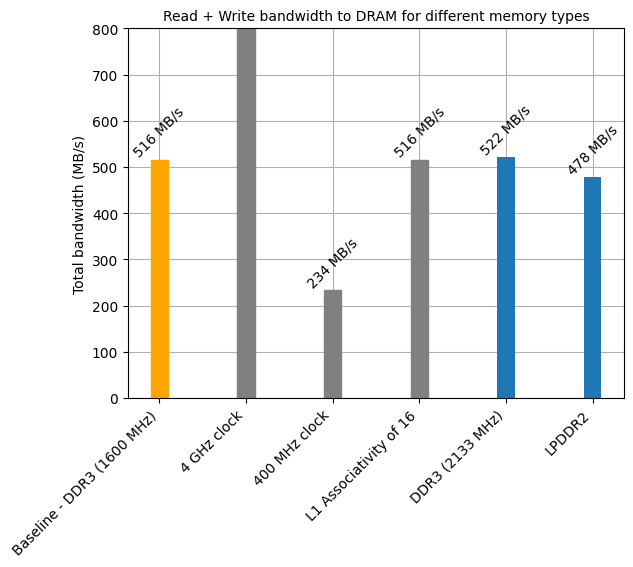

In [100]:
fig, ax = plt.subplots()
bars = ax.bar(y_values, x_values, width=0.2)
filter_names = ['Baseline (Two-level cache)','DDR3 (2133 MHz)','LPDDR2']

for idx, c in enumerate(ax.containers):
    # Filter the labels
    print(c)
    labels = [f"{v}" for v in c.datavalues]
    ax.bar_label(c, labels=labels, rotation=45, label_type="edge")

#= plt.figure(figsize=(8,5))
plt.grid()
#barlist = plt.bar(y_values, x_values, width=0.2)
bars[0].set_color('orange')
bars[1].set_color('grey')
bars[2].set_color('grey')
bars[3].set_color('grey')
plt.xticks(rotation=45, ha='right')
plt.ylim((0,200))
plt.ylabel("Miss latency (in thousands of ticks)")
plt.title('L1 cache miss latency (in thousands of ticks)', size=10)
plt.show()

In [122]:
hist_data = get_hist_data(part_1_paths, "rank0.totalEnergy")

y_values = [None] * 6
x_values = [None] * 6

for k,v in hist_data.items():
  idx = mapping[better_names[k]]
  y_values[idx] = better_names[k]
  x_values[idx] = int(v / 1e9)
  #x_values[idx] = int(int(v) / 1000)

<BarContainer object of 6 artists>


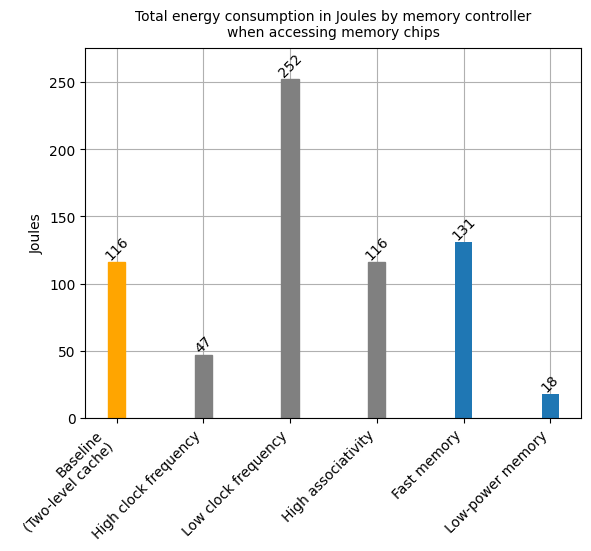

In [123]:
fig, ax = plt.subplots()
bars = ax.bar(y_values, x_values, width=0.2)
filter_names = ['Baseline (Two-level cache)','DDR3 (2133 MHz)','LPDDR2']

for idx, c in enumerate(ax.containers):
    # Filter the labels
    print(c)
    labels = [f"{v}" for v in c.datavalues]
    ax.bar_label(c, labels=labels, rotation=45, label_type="edge")

#= plt.figure(figsize=(8,5))
plt.grid()
#barlist = plt.bar(y_values, x_values, width=0.2)
bars[0].set_color('orange')
bars[1].set_color('grey')
bars[2].set_color('grey')
bars[3].set_color('grey')
plt.xticks(rotation=45, ha='right')
plt.ylim((0, 275))
plt.ylabel("Joules")
plt.title('Total energy consumption in Joules by memory controller\nwhen accessing memory chips', size=10, y=1.01)
plt.show()

In [166]:
def get_hist_data(paths):
  hist_data = dict()

  for p in paths:
      result_p = base_path / p
      stats_file = str(result_p / "*_stats.txt")
      files = glob.glob(stats_file)
      hist_data[p] = dict()
      for fil in files:
        run_num = int(fil.split("/")[-1].split("_")[1])+1 # get run number
        with open(fil, "r") as f:
          next(f)
          next(f)
          lines = f.readlines()
          for l in lines:
            l = re.sub("\s+", " ", l).split(" ")
            if l[0] == "simSeconds":
              hist_data[p][run_num] = float(l[1])
  return hist_data

In [138]:
part_2_paths = ["primes_random_rp", "primes_true_random_rp"]

hist_data = get_hist_data(part_2_paths)

test_df = pd.DataFrame.from_dict(hist_data).sort_index()
test_df.columns = ["RandomRP()", "TrueRandomRP()"]

labels = [i for i in range(1, 11)]
labels += labels

red = ["#FF6666"]*10
blue = ["#3399FF"]*10

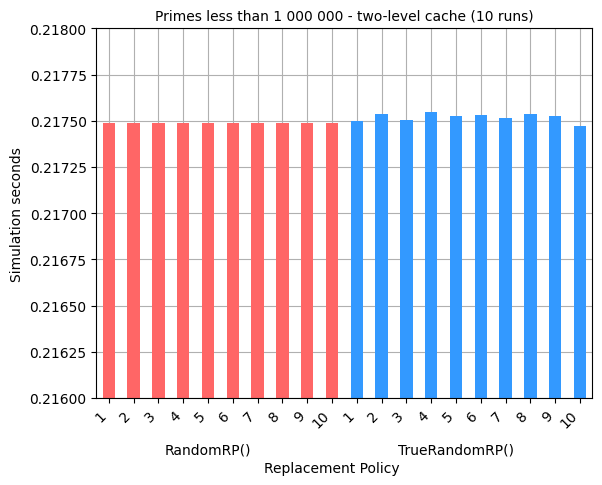

In [152]:
combined_df = pd.DataFrame.from_dict(hist_data).sort_index().unstack(0)

fig = test_df.unstack(0).plot.bar(color=red+blue)

plt.grid()
plt.ylim([0.216, 0.218])
plt.xticks(ticks=[i for i in range(20)], labels=labels, rotation=45, ha='right')
plt.title('Primes less than 1 000 000 - two-level cache (10 runs)', size=10)
plt.text(4,0.2157, 'RandomRP()', horizontalalignment='center')
plt.text(14,0.2157, 'TrueRandomRP()', horizontalalignment='center')
plt.text(9,0.2156, 'Replacement Policy', horizontalalignment='center')
plt.ylabel("Simulation seconds")
plt.show()

In [167]:
part_2_paths = ["primes_three_level_random_rp", "primes_three_level_true_random_rp"]

hist_data = get_hist_data(part_2_paths)

test_df = pd.DataFrame.from_dict(hist_data).sort_index()
test_df.columns = ["RandomRP()", "TrueRandomRP()"]

labels = [i for i in range(1, 11)]
labels += labels

red = ["#FF6666"]*10
blue = ["#3399FF"]*10

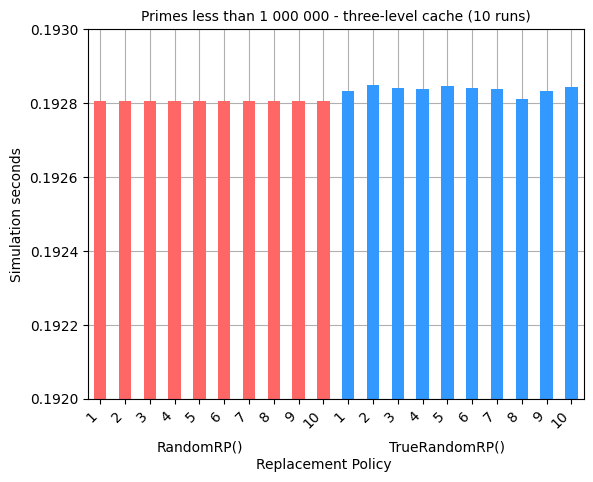

In [179]:
combined_df = pd.DataFrame.from_dict(hist_data).sort_index().unstack(0)

fig = test_df.unstack(0).plot.bar(color=red+blue)

plt.grid()
plt.ylim([0.192, 0.193])
plt.xticks(ticks=[i for i in range(20)], labels=labels, rotation=45, ha='right')
plt.title('Primes less than 1 000 000 - three-level cache (10 runs)', size=10)
plt.text(4,0.191858, 'RandomRP()', horizontalalignment='center')
plt.text(14,0.191858, 'TrueRandomRP()', horizontalalignment='center')
plt.text(9,0.19181, 'Replacement Policy', horizontalalignment='center')
plt.ylabel("Simulation seconds")
plt.show()